## **Task 4.10 - Part 1**

# Table of Contents
1. Importing Libraries and Data
2. Security
3. Regional Data
4. Spending Habits Between Regions
5. Removing Low-Activity Customers
6. Profile Variables
7. Visualizations
8. Comparing Profiles with Regions and Departments
9. Exporting Notebook

## **1. Importing Libraries and Data**

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#importing data

path = r'C:\users\jonsa\documents\Instacart Basket Analysis'

In [3]:
df_merge = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
#Checking shape of the dataframe

df_merge.shape

(32404859, 34)

In [5]:
#Checking column names and information in first 5 rows

df_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,only_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,marriage_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## **2. Security**

In [7]:
#Checking column names

df_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'only_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending',
       'spending_flag', 'order_frequency', 'frequency_flag', 'first_name',
       'last_name', 'gender', 'state', 'age', 'date_joined',
       'num_of_dependants', 'marriage_status', 'income'],
      dtype='object')

In [ ]:
df_merge.rename(['num_of_dependants'], ['num_of_dependents'])

Our dataframe has two columns that identifying information: first_name, last_name. We will drop these columns from our dataframe to ensure privacy

In [11]:
#Dropping columns first_name, last_name

df_merge_secure = df_merge.drop(columns = ['first_name', 'last_name'])

In [12]:
#Checking to ensure our columns were dropped correctly

df_merge_secure.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,only_order,product_id,add_to_cart_order,reordered,...,spending_flag,order_frequency,frequency_flag,gender,state,age,date_joined,num_of_dependants,marriage_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


## **3. Regional Data**

In [13]:
#Checking state count

df_merge_secure['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

Our data set has 50 states plus District of Columbia included.

In [16]:
#creating region list

result = []

for value in df_merge_secure['state']:
    if (value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value == 'New Jersey'):
        result.append('Northeast')
    elif (value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri'):
        result.append('Midwest')
    elif (value == 'Delaware') or (value == 'Maryland') or (value == 'District of Columbia') or (value == 'Virginia') or (value == 'West Virginia') or (value == 'North Carolina') or (value == 'South Carolina') or (value == 'Georgia') or (value == 'Florida') or (value == 'Kentucky') or (value == 'Tennessee') or (value == 'Mississippi') or (value == 'Alabama') or (value == 'Oklahoma') or (value == 'Texas') or (value == 'Arkansas') or (value == 'Louisiana'):
        result.append('South')
    elif (value == 'Idaho') or (value == 'Montana') or (value == 'Wyoming') or (value == 'Nevada') or (value == 'Utah') or (value == 'Colorado') or (value == 'Arizona') or (value == 'New Mexico') or (value == 'Alaska') or (value == 'Washington') or (value == 'Oregon') or (value == 'California') or (value == 'Hawaii'):
        result.append('West')

In [18]:
#adding region column to dataframe

df_merge_secure['region'] = result

In [19]:
#checking counts of each region

df_merge_secure['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

## **4. Spending Habits Between Regions**

In [20]:
#creating a crosstab to check

crosstab = pd.crosstab(df_merge_secure['region'], df_merge_secure['spending_flag'], dropna = False)

In [22]:
#checking results of crosstab

crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [24]:
#Calculating percentages of high spenders in each region

MW = (155968 / (155968 + 7441357)) * 100
NE = (108200 / (108200 + 5614536)) * 100
S = (209691 / (209691 + 10582194)) * 100
W = (160354 / (160354 + 8132559)) * 100

[MW, NE, S, W]

[2.052933104744104, 1.8907040268850424, 1.9430433144904713, 1.9336269414619447]

We can see that on average, high spenders account for 2% of each region

## **5. Removing Low-Activity Customers**

Creating flags to identify low activity customers (low activity = less than 5 orders)

In [26]:
df_merge_secure.loc[df_merge_secure['max_order'] < 5, 'exclusion_flag'] = 'Low activity customer'

In [27]:
df_merge_secure.loc[df_merge_secure['max_order'] >= 5, 'exclusion_flag'] = 'Normal activity customer'

In [28]:
df_merge_secure['exclusion_flag'].value_counts(dropna = False)

Normal activity customer    30964564
Low activity customer        1440295
Name: exclusion_flag, dtype: int64

In [29]:
#Creating dataframe with low activity customers to ensure our data filtered properly

df_low_activ_cust = df_merge_secure[df_merge_secure['exclusion_flag'] == 'Low activity customer']

In [30]:
df_low_activ_cust['max_order'].value_counts(dropna = False)

4    753543
3    686741
2         6
1         5
Name: max_order, dtype: int64

We can see that all orders are below 5 meaning our data has filtered correctly

In [31]:
#Creating dataframe excluding low activity customers

df_norm_activ_cust = df_merge_secure[df_merge_secure['exclusion_flag'] == 'Normal activity customer']

In [32]:
#Checking dataframe

df_norm_activ_cust['max_order'].value_counts(dropna = False)

99    1171333
8      811843
6      811396
9      810213
7      803979
       ...   
93      50333
90      48328
97      44949
98      44587
96      40453
Name: max_order, Length: 95, dtype: int64

All orders are 5 or above as expected

In [34]:
#Exporting dataframe

df_norm_activ_cust.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_cust_norm_activ.pkl'))

## **6. Profile Variables**

## **Age**

In [35]:
df_merge_secure['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [36]:
#From the data above, we can see that our ages are as follows:
#Min: 18
#Average: 49
#Max: 81

In [38]:
# Creating list based on age group

age_group_list = []

for value in df_merge_secure['age']:
    if (value >= 18) and (value <= 24):
        age_group_list.append('18-24')
    elif (value >= 25) and (value <= 34):
        age_group_list.append('25-34')
    elif (value >= 35) and (value <= 44):
        age_group_list.append('35-44')
    elif (value >= 45) and (value <= 54):
        age_group_list.append('45-54')
    elif (value >= 55) and (value <= 64):
        age_group_list.append('55-64')
    elif (value >= 65) and (value <= 74):
        age_group_list.append('65-74')
    elif (value >= 75) and (value <= 84):
        age_group_list.append('75-84')
    elif (value >= 85):
        age_group_list.append('85+')

In [39]:
#Creating an age_group column in dataframe

df_merge_secure['age_group'] = age_group_list

In [41]:
#Results of age group list

df_merge_secure['age_group'].value_counts(dropna = False).sort_index()

18-24    3573001
25-34    5054654
35-44    5062429
45-54    5111126
55-64    5028565
65-74    5005001
75-84    3570083
Name: age_group, dtype: int64

We can see above that the most populated age group is 45-54 followed closely be 35-44, 25-34, 55-64, and 65-74 with steeper dropoffs in the 18-24 and 75-84 categories

## **Income**

In [42]:
df_merge_secure['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [45]:
#From the data above, we can see income distributions are as follows:
#Min: $25,903
#Average: $99,437
#Max: $593,901

In [46]:
#Creating list for income groups

income_group_list = []

for value in df_merge_secure['income']:
    if (value >= 25000) and (value <= 50000):
        income_group_list.append('25000-50000')
    elif (value >= 50000) and (value <= 75000):
        income_group_list.append('50000-75000')
    elif (value >= 75000) and (value <= 100000):
        income_group_list.append('75000-100000')
    elif (value >= 100000) and (value <= 125000):
        income_group_list.append('100000-125000')
    elif (value >= 125000) and (value <= 150000):
        income_group_list.append('125000-150000')
    elif (value >= 150000) and (value <= 175000):
        income_group_list.append('150000-175000')
    elif (value >= 175000) and (value <= 200000):
        income_group_list.append('175000-200000')
    elif (value >= 200000) and (value <= 300000):
        income_group_list.append('200000-300000')
    elif (value >= 300000) and (value <= 400000):
        income_group_list.append('300000-400000')
    elif (value >= 400000) and (value <= 500000):
        income_group_list.append('400000-500000')
    elif value >= 500000:
        income_group_list.append('500000+')

In [47]:
#Assigning income list to column in dataframe

df_merge_secure['income_group'] = income_group_list

In [50]:
#Checking values

df_merge_secure['income_group'].value_counts(dropna = False)

75000-100000     7147837
50000-75000      6848737
100000-125000    6183245
125000-150000    4580117
150000-175000    3743496
25000-50000      3594083
200000-300000     156820
300000-400000      53931
175000-200000      48901
400000-500000      28337
500000+            19355
Name: income_group, dtype: int64

Our most popular income range is 75,000 - 100,000 with our least popular being 500,000+. Surprisingly, there are more results in the 300,000 - 400,000 range than there are in the 175,000 - 200,000 range.

## **Goods**

In [51]:
#checking values in each department

df_merge_secure['department_id'].value_counts().sort_index()

1     2234743
2       36291
3     1172428
4     9479291
5      153696
6      269253
7     2688123
8       97716
9      866627
10      34573
11     447572
12     708927
13    1875369
14     703033
15    1068058
16    5398747
17     738666
18     423802
19    2887550
20    1051249
21      69145
Name: department_id, dtype: int64

In [52]:
# Creating list of goods by group

goods_group_list = []

for value in df_merge_secure['department_id']:
    if value == 1:
        goods_group_list.append('Frozen')
    elif value == 2:
        goods_group_list.append('Other')
    elif value == 3:
        goods_group_list.append('Bakery')
    elif value == 4:
        goods_group_list.append('Produce')
    elif value == 5:
        goods_group_list.append('Alcohol')
    elif value == 6:
        goods_group_list.append('International')
    elif value == 7:
        goods_group_list.append('Beverages')
    elif value == 8:
        goods_group_list.append('Pets')
    elif value == 9:
        goods_group_list.append('Dry goods pasta')
    elif value == 10:
        goods_group_list.append('Bulk')
    elif value == 11:
        goods_group_list.append('Personal care')
    elif value == 12:
        goods_group_list.append('Meat seafood')
    elif value == 13:
        goods_group_list.append('Pantry')
    elif value == 14:
        goods_group_list.append('Breakfast')
    elif value == 15:
        goods_group_list.append('Canned goods')
    elif value == 16:
        goods_group_list.append('Dairy eggs')
    elif value == 17:
        goods_group_list.append('Household')
    elif value == 18:
        goods_group_list.append('Babies')
    elif value == 19:
        goods_group_list.append('Snacks')
    elif value == 20:
        goods_group_list.append('Deli')
    elif value == 21:
        goods_group_list.append('Missing')

In [53]:
#Assining goods group to a column in dataframe

df_merge_secure['goods_group'] = goods_group_list

In [54]:
df_merge_secure['goods_group'].value_counts()

Produce            9479291
Dairy eggs         5398747
Snacks             2887550
Beverages          2688123
Frozen             2234743
Pantry             1875369
Bakery             1172428
Canned goods       1068058
Deli               1051249
Dry goods pasta     866627
Household           738666
Meat seafood        708927
Breakfast           703033
Personal care       447572
Babies              423802
International       269253
Alcohol             153696
Pets                 97716
Missing              69145
Other                36291
Bulk                 34573
Name: goods_group, dtype: int64

Our most abundant goods by a wide margin are in the produce department with our least amount being in the bulk department.

## **Dependents**

In [55]:
#Checking number of dependants 

df_merge_secure['num_of_dependants'].value_counts().sort_index()

0    8097503
1    8081104
2    8091143
3    8135109
Name: num_of_dependants, dtype: int64

In [56]:
#Creating list of parents vs non-parents

dependants_group_list = []

for value in df_merge_secure['num_of_dependants']:
    if value == 0:
        dependants_group_list.append('Non-parent')
    else:
        dependants_group_list.append('Parent')

In [59]:
#Creating column for parents vs non-parents in dataframe

df_merge_secure['parent'] = dependants_group_list

In [60]:
df_merge_secure['parent'].value_counts()

Parent        24307356
Non-parent     8097503
Name: parent, dtype: int64

Approximately 75% of our customer base are parents with 25% being non-parents.

## **7. Visualizations**

## **Age**

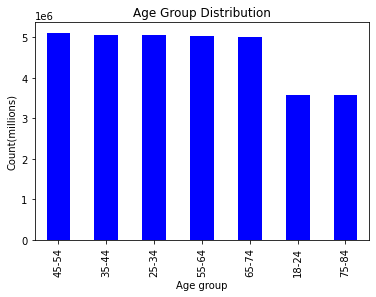

In [65]:
#Creating a bar chart to show the different age groups

age_bar_chart = df_merge_secure['age_group'].value_counts().plot.bar(color = 'blue', xlabel = 'Age group', ylabel = 'Count(millions)', title = 'Age Group Distribution')

In [66]:
#Saving chart

age_bar_chart.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_group_bar_chart.png'))

## **Income**

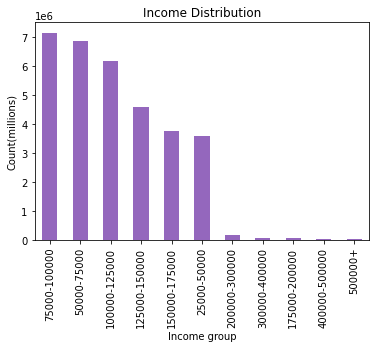

In [69]:
#Creating bar chart to show different 

income_bar_chart = df_merge_secure['income_group'].value_counts().plot.bar(color = 'tab:purple', xlabel = 'Income group', ylabel = 'Count(millions)', title = 'Income Distribution')

In [70]:
#Saving chart

income_bar_chart.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'income_group_distribution_bar.png'))

## **Goods**

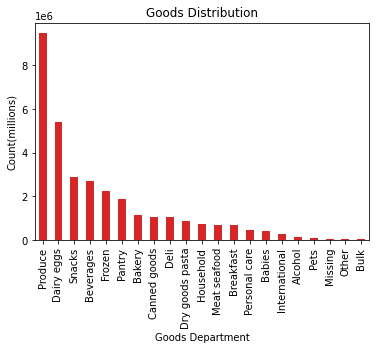

In [71]:
#Creating bar chart to show distribution of goods

goods_bar_chart = df_merge_secure['goods_group'].value_counts().plot.bar(color = 'tab:red', xlabel = 'Goods Department', ylabel = 'Count(millions)', title = 'Goods Distribution')

In [72]:
#Saving chart

goods_bar_chart.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'goods_distribution_bar.png'))

## **Dependants**

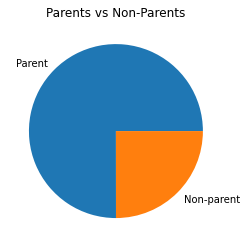

In [75]:
#Creating pie chart to show parents vs non-parents

dependents_chart = df_merge_secure['parent'].value_counts().plot.pie(title = 'Parents vs Non-Parents', ylabel = '')

In [76]:
#Saving chart

dependants_chart.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'parents_nonparents_pie.png'))

## **8. Comparing Profiles with Regions and Departments**

In [77]:
#Creating crosstab showing high/low spenders based on region

region_spending_crosstab = pd.crosstab(df_merge_secure['region'], df_merge_secure['spending_flag'], dropna = False)

In [78]:
#results

region_spending_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


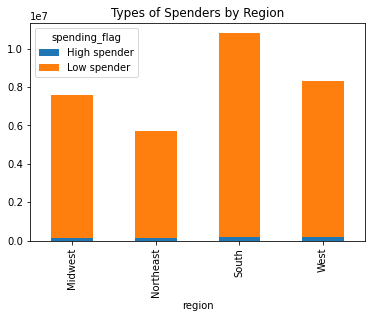

In [79]:
region_spending_bar_chart = region_spending_crosstab.plot.bar(stacked = True, title = 'Types of Spenders by Region')

In [81]:
#Saving chart

region_spending_bar_chart.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'region_spending_bar_chart.png'))

## **9. Exporting Notebook**

In [1]:
df_merge_secure.head(1)

NameError: name 'df_merge_secure' is not defined